In [18]:
import numpy as np
import pandas as pd
from scipy.stats import t, norm, ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds=pd.read_csv('data/diamonds_train.csv')
diamonds['total_depth'] = 2 * diamonds['z'] / (diamonds['x'] + diamonds['y']) 

cut_dict={'Ideal':5,
'Premium':4,
'Very Good':3,
'Good':2,
'Fair':1}

clarity_dict={'IF':8,
'VVS1':7,
'VVS2':6,
'VS1':5,
'VS2':4,
'SI1':3,
'SI2':2,
'I1':1}

color_dict={'D':7,
'E':6,
'F':5,
'G':4,
'H':3,
'I':2,
'J':1}

diamonds['num_cut']=diamonds.cut.apply(lambda x: cut_dict[x])
diamonds['num_clarity']=diamonds.clarity.apply(lambda x: clarity_dict[x])
diamonds['num_color']=diamonds.color.apply(lambda x: color_dict[x])
diamonds['price/carat']=diamonds.price/diamonds.carat

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.624082,4,4,1,3527.272727
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,0.630011,3,4,3,1578.125000
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.654709,1,5,4,3783.098592
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,0.638298,2,3,7,1800.000000
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.604900,5,3,4,4786.274510



price: price in USD 

carat: weight of the diamond 

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

color: diamond colour, from J (worst) to D (best) 

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 

x: length in mm 

y: width in mm 

z: depth in mm 

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) 

table: width of top of diamond relative to widest point (43--95) 

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        40455 non-null  float64
 1   cut          40455 non-null  object 
 2   color        40455 non-null  object 
 3   clarity      40455 non-null  object 
 4   depth        40455 non-null  float64
 5   table        40455 non-null  float64
 6   price        40455 non-null  int64  
 7   x            40455 non-null  float64
 8   y            40455 non-null  float64
 9   z            40455 non-null  float64
 10  total_depth  40451 non-null  float64
 11  num_cut      40455 non-null  int64  
 12  num_clarity  40455 non-null  int64  
 13  num_color    40455 non-null  int64  
 14  price/carat  40455 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 4.6+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40451.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154,0.617350,3.904783,4.049388,4.400766,4002.529490
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062,0.018370,1.117876,1.648181,1.701260,2009.855831
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1051.162791
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,0.610417,3.000000,3.000000,3.000000,2470.967742
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000,0.618391,4.000000,4.000000,4.000000,3492.207792
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000,0.625282,5.000000,5.000000,6.000000,4946.916509
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000,1.006965,5.000000,8.000000,7.000000,17828.846154


In [6]:
# Hay 4 valores menos en total-depth debido a dividir entre 0 (no se tienen valores x ni y)
diamonds[diamonds.total_depth.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,NaN,2,2,5,3000.000000
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0,NaN,4,2,3,8015.111111
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,NaN,2,2,5,3000.000000
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0,NaN,1,5,4,5597.368421


In [7]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'total_depth', 'num_cut', 'num_clarity', 'num_color',
       'price/carat'],
      dtype='object')

{'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}


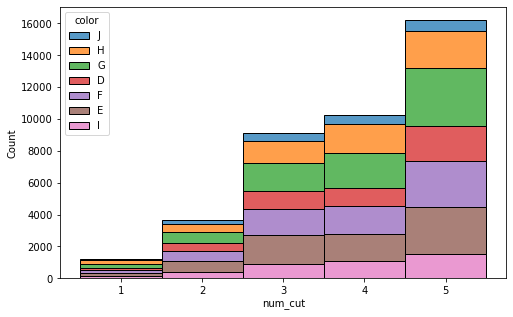

In [8]:
# diamonds['cut'].value_counts()
fig,ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=diamonds, x='num_cut', hue='color', multiple="stack",discrete=True)
print(cut_dict)

{'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}


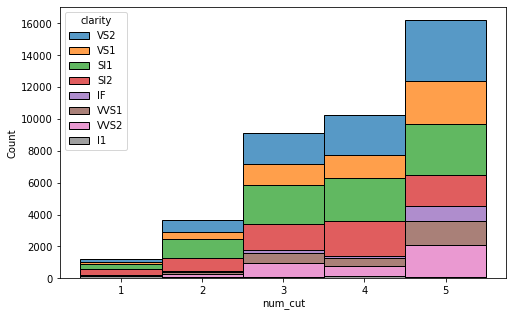

In [9]:
# diamonds['clarity'].value_counts()
fig,ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=diamonds, x='num_cut', hue='clarity', multiple="stack",discrete=True)
print(cut_dict)

{'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}


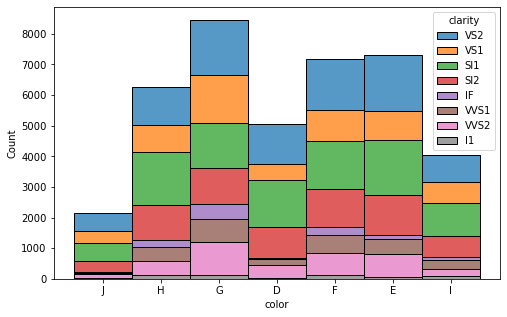

In [10]:
# diamonds['color'].value_counts()
fig,ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=diamonds, x='color', hue='clarity', multiple="stack")
print(clarity_dict)

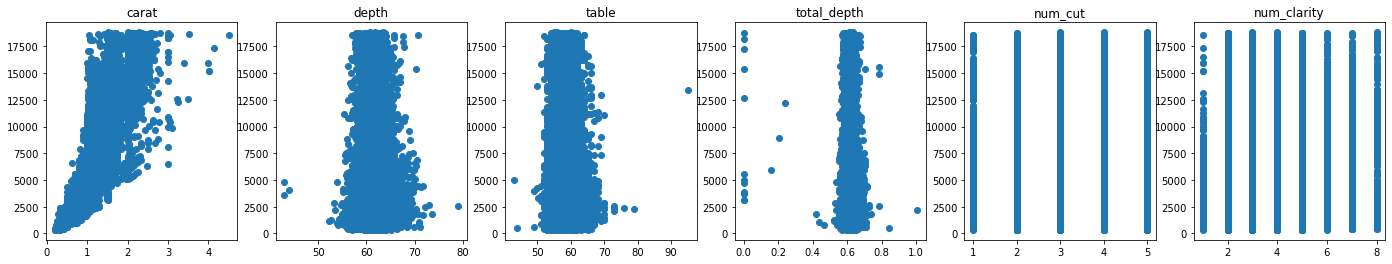

In [45]:
fig1,ax1= plt.subplots(ncols=6, figsize=(24,4))
list_col=['carat','depth', 'table','total_depth','num_cut','num_clarity']
for i in range(len(list_col)):
    ax1[i].scatter(x=diamonds[list_col[i]], y=diamonds.price)
    ax1[i].set_title(list_col[i])


The rows of figures follow the order: ['D', 'E', 'F', 'G', 'H', 'I', 'J']


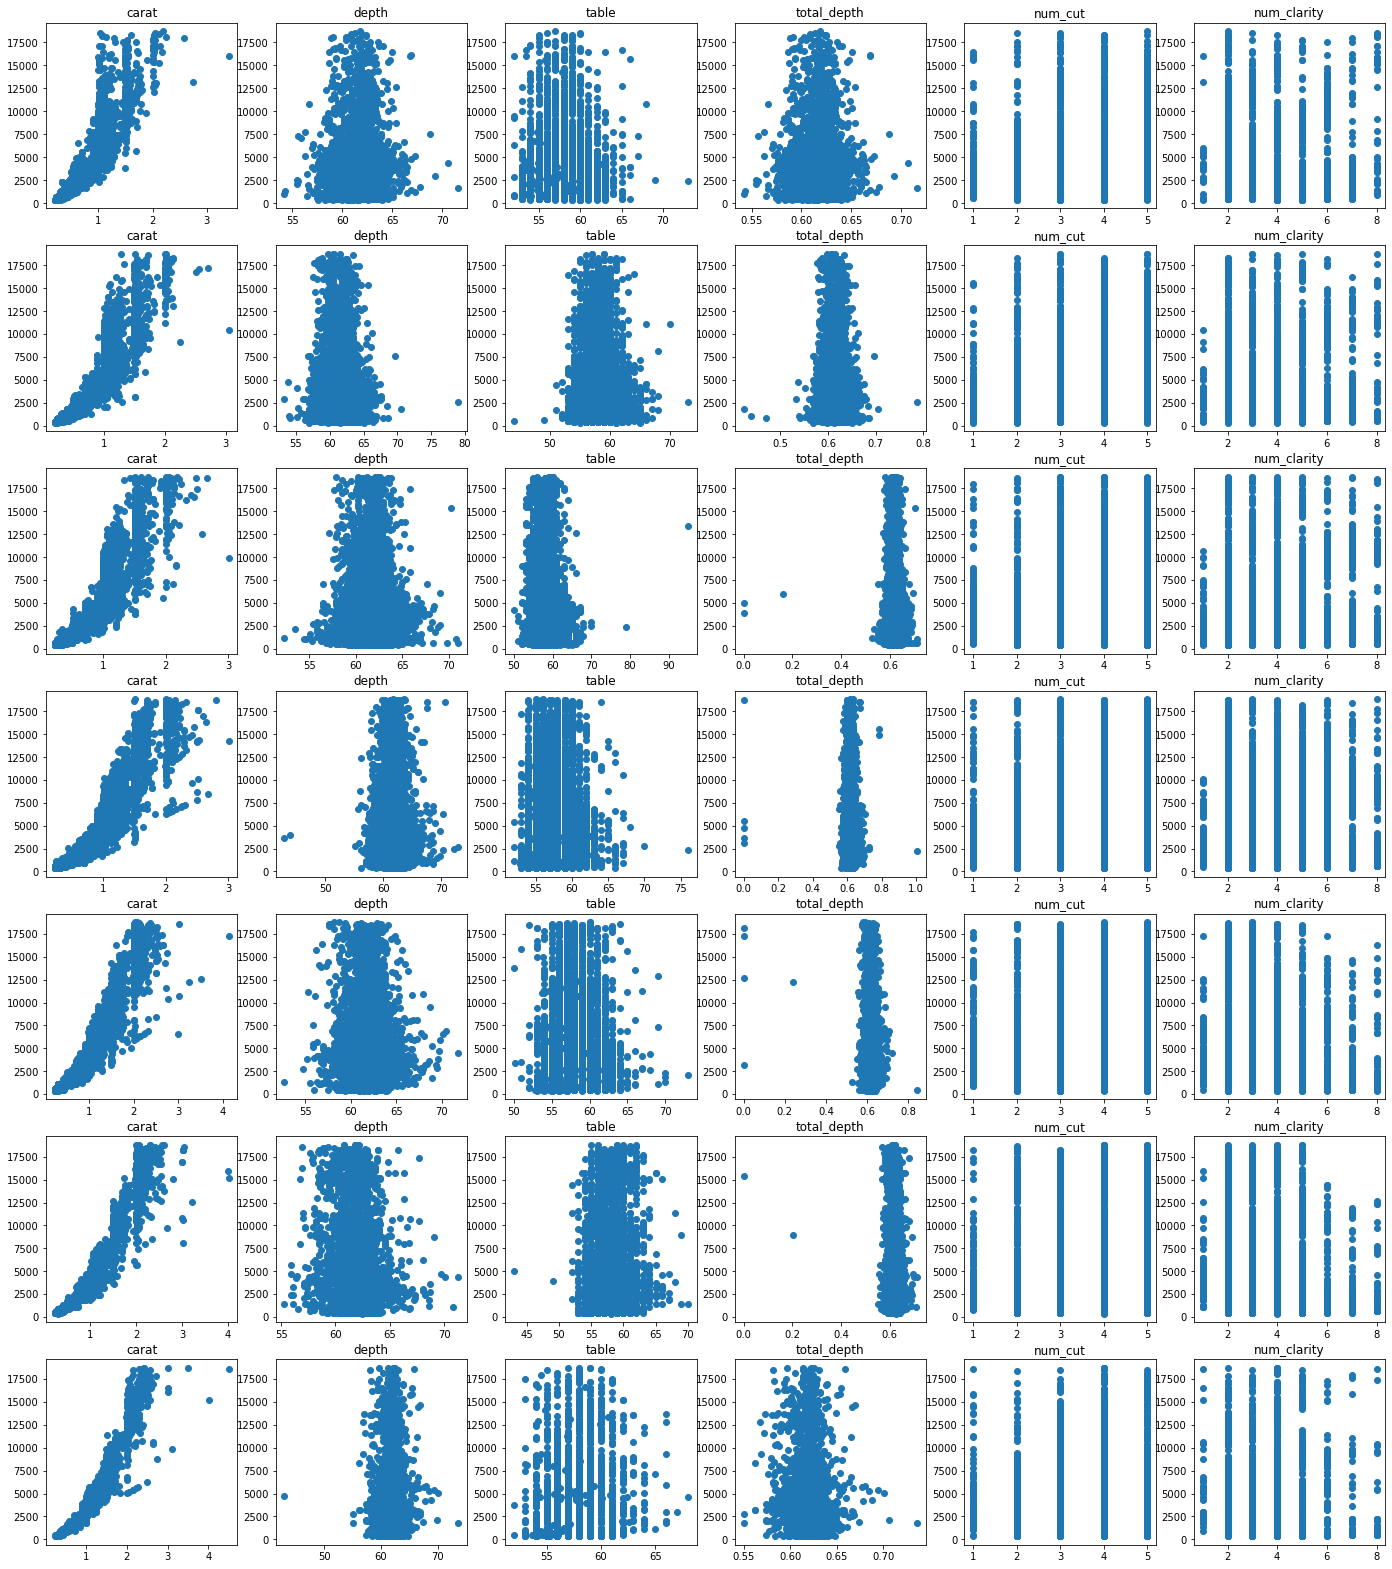

In [46]:
color_list=list(diamonds['color'].unique())
color_list.sort()

fig_color,ax_color= plt.subplots(ncols=6,nrows=7,  figsize=(24,28))
# list_col=['carat','depth', 'table','total_depth','num_cut','num_clarity']
j=0

print(f'The rows of figures follow the order: {color_list}')
for color in color_list:
    filter_by_color=diamonds[diamonds['color']==color]
#     fig_color.suptitle(color)
    for i in range(len(list_col)):
        ax_color[j][i].scatter(x=filter_by_color[list_col[i]], y=filter_by_color.price)
        ax_color[j][i].set_title(list_col[i])
    j+=1

{'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}


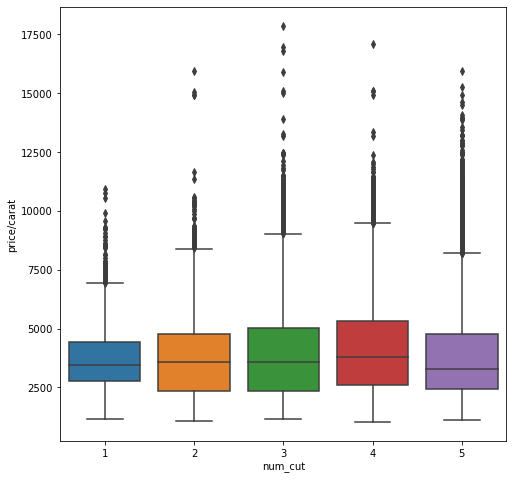

In [17]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.boxplot(x='num_cut', y='price/carat', data=diamonds)
print(cut_dict)

{'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}


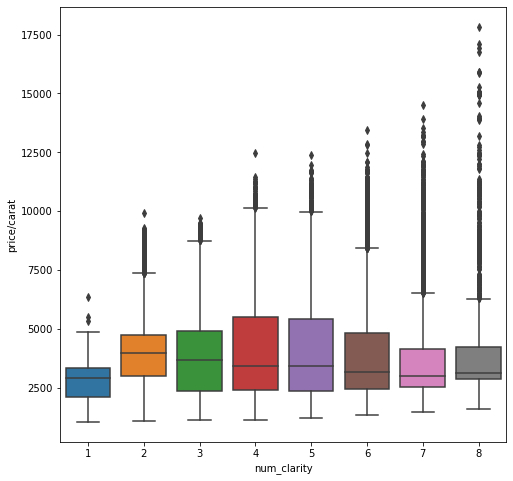

In [18]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.boxplot(x='num_clarity', y='price/carat', data=diamonds)
print(clarity_dict)

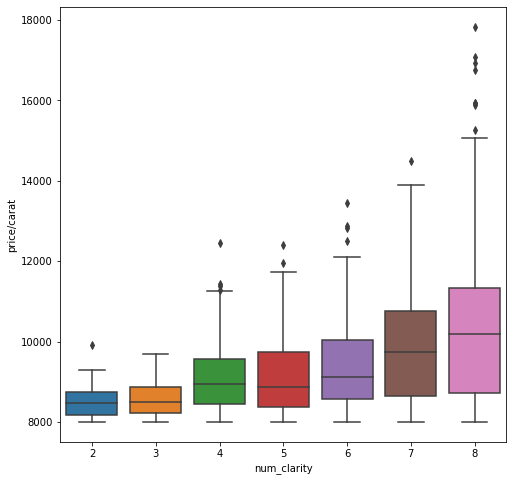

In [19]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.boxplot(x='num_clarity', y='price/carat', data=diamonds[diamonds['price/carat']>8000])

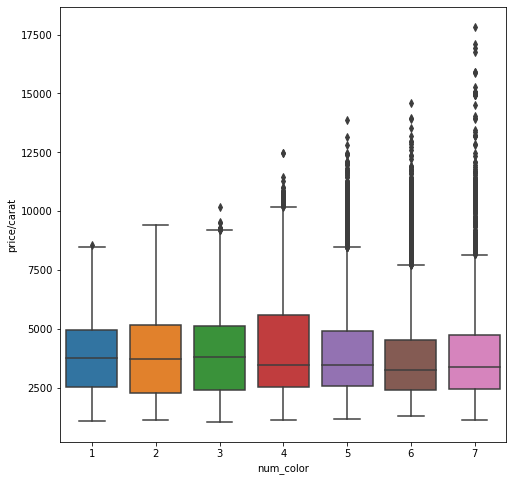

In [20]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.boxplot(x='num_color', y='price/carat', data=diamonds)

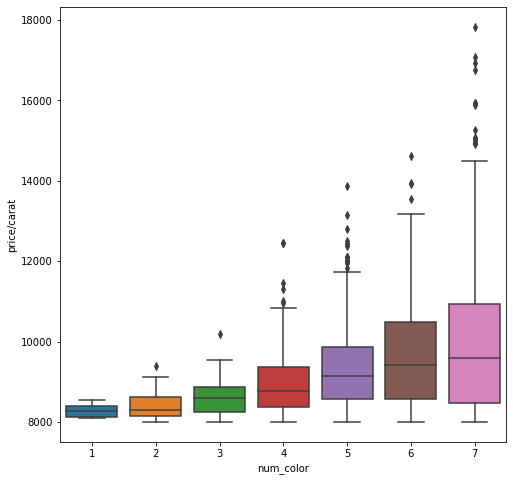

In [21]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.boxplot(x='num_color', y='price/carat', data=diamonds[diamonds['price/carat']>8000])

{'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}


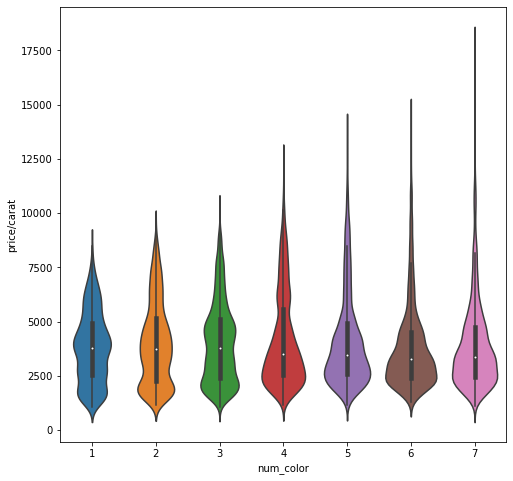

In [22]:
fig_box,ax_box = plt.subplots(figsize=(8, 8))
ax_box = sns.violinplot(x='num_color', y='price/carat', data=diamonds)
print(color_dict)

<AxesSubplot:>

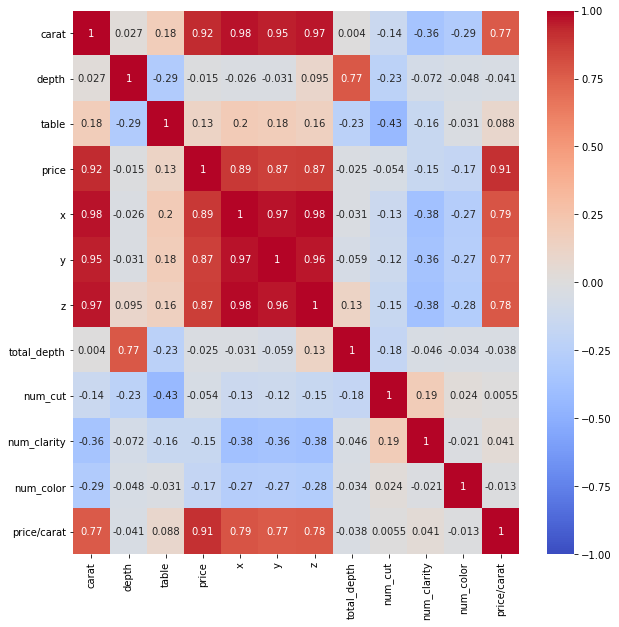

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=diamonds.select_dtypes(include=['float64','int64']).corr(), vmax=1, vmin=-1, annot=True, cmap='coolwarm')

In [ ]:
# Logico que tenga una fuerte correlacion entre price, x,y,z con carat (peso), a traves del volumen.
# Sorprende la baja correlación (negativa) entre cut y clarity con el precio

<AxesSubplot:>

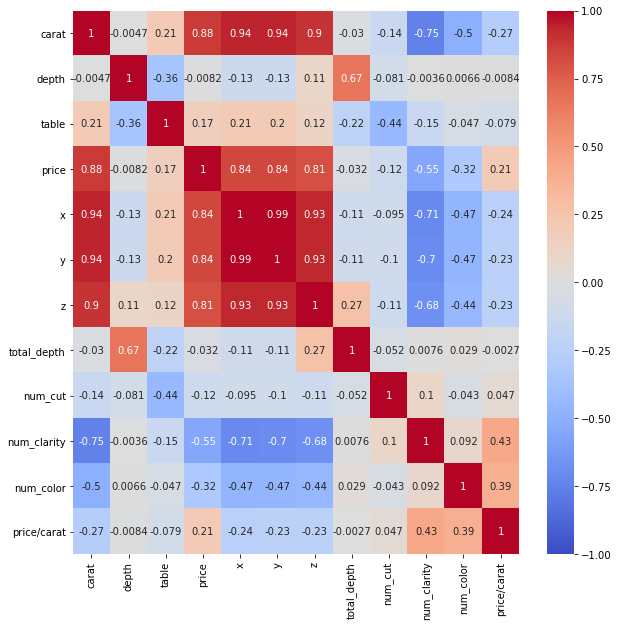

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=diamonds[diamonds['price/carat']>8000].select_dtypes(include=['float64','int64']).corr(), vmax=1, vmin=-1, annot=True, cmap='coolwarm')


In [ ]:
# Cuando filtramos los diamantes pequeños (de poco valor), vemos mayor correlacion en las variable clarity y color, aunque no en cut.

In [28]:
diamonds.groupby('color').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
color,,,,,,,,,,,,
G,0.774382,61.752785,57.287889,4023.214902,5.684102,5.687183,3.508856,0.617272,3.989355,4.458309,4.0,4171.555393
F,0.731503,61.689954,57.409726,3677.355720,5.601393,5.607254,3.455930,0.616657,3.897032,4.134039,5.0,4106.324111
H,0.910355,61.827481,57.533503,4476.469014,5.981431,5.984082,3.693629,0.617917,3.876374,3.942011,3.0,4006.343705
I,1.026791,61.873214,57.562574,5090.868800,6.216099,6.215675,3.842078,0.618487,3.858631,3.942956,2.0,3980.836098
D,0.653036,61.721886,57.344959,3134.943157,5.404704,5.409541,3.336782,0.617239,3.935037,3.705090,7.0,3937.805478
J,1.166500,61.909626,57.790701,5346.234112,6.527285,6.525570,4.039879,0.619237,3.735047,3.753271,1.0,3827.670485
E,0.658835,61.659836,57.494567,3088.342526,5.413894,5.418651,3.338709,0.616531,3.893242,3.968874,6.0,3810.101878


In [29]:
diamonds[diamonds['price/carat']>8000].groupby('color').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
color,,,,,,,,,,,,
D,1.275803,61.658394,57.439416,12687.354015,6.910985,6.922956,4.264489,0.616619,4.003650,5.003650,7.0,10088.133432
E,1.365457,61.473629,57.610966,13016.898172,7.083238,7.091227,4.355405,0.614825,3.976501,4.908616,6.0,9612.059494
F,1.385285,61.495196,57.440569,12918.804270,7.117527,7.120801,4.377189,0.614952,4.051601,5.042705,5.0,9341.861656
G,1.475770,61.595956,57.253188,13277.827372,7.277745,7.282364,4.482846,0.615818,4.265941,5.275272,4.0,8966.904501
H,1.893492,61.615344,57.738624,16256.243386,7.880423,7.876296,4.825132,0.612641,4.021164,3.968254,3.0,8578.928434
I,2.030000,61.395935,58.520325,17046.260163,8.123089,8.116423,4.983740,0.613942,3.902439,4.065041,2.0,8398.479177
J,2.104444,61.744444,57.166667,17433.444444,8.236667,8.208889,5.077778,0.617561,4.444444,6.333333,1.0,8284.456365


In [92]:
diamonds.color.value_counts()

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

In [79]:
diamonds.groupby('cut').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,price/carat
cut,,,,,,,,,,,
Premium,0.896125,61.261082,58.737076,4617.322612,5.982015,5.954603,3.651374,0.612184,4.0,3.734795,4231.131397
Very Good,0.808056,61.824794,57.956031,3994.444420,5.743912,5.773269,3.559988,0.618249,3.0,3.992413,4014.378029
Ideal,0.700337,61.703206,55.952990,3436.112577,5.500933,5.512639,3.396982,0.616901,5.0,4.460789,3908.044496
Good,0.844565,62.407699,58.652307,3880.611794,5.824797,5.836140,3.632361,0.623689,2.0,3.596506,3832.597411
Fair,1.047305,64.051438,59.022104,4333.271980,6.248825,6.184289,3.985193,0.641103,1.0,3.007395,3757.492344


In [30]:
diamonds[diamonds['price/carat']>8000].groupby('cut').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
cut,,,,,,,,,,,,
Ideal,1.396674,61.642903,56.236653,12983.120763,7.137044,7.151271,4.403528,0.616395,5.0,5.243644,4.753178,9354.270035
Very Good,1.491495,61.578526,58.103789,13662.275789,7.253684,7.296526,4.478884,0.615796,3.0,4.981053,4.846316,9258.330494
Good,1.580849,62.101887,58.867925,14350.650943,7.343585,7.366038,4.563491,0.621076,2.0,4.594340,4.943396,9193.471651
Premium,1.569858,61.200000,58.647559,14178.344882,7.437402,7.398346,4.530630,0.610972,4.0,4.525984,4.702362,9101.577952
Fair,1.527826,64.021739,58.956522,13729.304348,7.163478,7.073913,4.548261,0.638465,1.0,4.652174,5.260870,9054.600859


In [33]:
diamonds.groupby('clarity').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
clarity,,,,,,,,,,,,
IF,0.499849,61.511454,56.496684,2797.897513,4.953451,4.975011,3.052427,0.615033,4.442351,8.0,4.104748,4217.324475
VVS2,0.591777,61.658884,57.031561,3240.978942,5.206976,5.220753,3.213917,0.616505,4.116083,6.0,4.570150,4178.017868
VS1,0.721553,61.678948,57.285410,3796.813551,5.555437,5.562798,3.428205,0.616797,4.013188,5.0,4.172272,4129.189881
VS2,0.762661,61.721345,57.404520,3913.590182,5.655557,5.656696,3.489658,0.617108,3.985619,4.0,4.487024,4074.905291
SI2,1.081472,61.779954,57.909150,5101.044307,6.408255,6.407433,3.952679,0.617308,3.660268,2.0,4.463992,4025.614743
VVS1,0.506994,61.606921,56.929740,2559.498558,4.973554,4.988504,3.068893,0.616171,4.222783,7.0,4.359048,3882.807337
SI1,0.851174,61.859668,57.648549,3999.856908,5.888604,5.888270,3.639990,0.618429,3.742435,3.0,4.430813,3844.657269
I1,1.299591,62.804796,58.237478,3971.206039,6.782771,6.729485,4.227318,0.626059,2.969805,1.0,3.907638,2798.055592


In [32]:
diamonds[diamonds['price/carat']>8000].groupby('clarity').mean().sort_values('price/carat',ascending=False)

,carat,depth,table,price,x,y,z,total_depth,num_cut,num_clarity,num_color,price/carat
clarity,,,,,,,,,,,,
IF,1.157032,61.435484,57.442581,12210.316129,6.722645,6.744903,4.135355,0.614276,4.032258,8.0,4.890323,10631.641800
VVS1,1.178517,61.483898,57.238559,11676.652542,6.768220,6.785254,4.165000,0.614829,4.207627,7.0,4.872881,9901.770005
VVS2,1.196228,61.596121,57.022845,11259.040948,6.795474,6.809030,4.189978,0.615989,4.256466,6.0,5.066810,9384.143281
VS1,1.454874,61.519095,57.381658,13390.758794,7.245477,7.248844,4.457462,0.615128,4.160804,5.0,4.736181,9154.160830
VS2,1.607331,61.658522,57.729979,14585.338809,7.493491,7.486735,4.606550,0.615252,3.969199,4.0,4.593429,9082.538340
SI1,1.853908,61.541197,57.889437,15912.890845,7.871549,7.863275,4.839683,0.615315,4.000000,3.0,4.404930,8575.172582
SI2,2.048113,61.350314,58.241509,17368.000000,8.099623,8.098616,4.966604,0.613452,3.786164,2.0,4.955975,8487.659334


In [64]:
print(clarity_dict)

{'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}


BONUS!

Test 1 - one sample vs constant hypothesis test. We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.



In [8]:
price_serie=diamonds['price'].dropna()

print(f'Mean price of the sample is {price_serie.mean()}')
print(f'Standard deviation of the sample is {price_serie.std()}')
print('H0 = Mean value is equal to 4000 USD')
print('H1 = Mean value is not equal to 4000 USD')
result=ttest_1samp(price_serie, 4000)

if result.pvalue <= 0.05:
      print(f'Pvalue is {result.pvalue.round(5)} so H0 is rejected and H1 is accepted: The mean is significately different from 4000 USD')

Mean price of the sample is 3928.444469163268
Standard deviation of the sample is 3992.4161466170863
H0 = Mean value is equal to 4000 USD
H1 = Mean value is not equal to 4000 USD
Pvalue is 0.00031 so H0 is rejected and H1 is accepted: The mean is significately different from 4000 USD


Test 2 - two independent samples. Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that you might feel suspicious about it:

Sub-Test 1: Fair cut + color G vs. Fair cut + color I

Sub-Test 2: Good cut + color E vs. Good cut + color F

Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

Sub-Test 4: Premium cut + color D vs. Premium cut + color E

Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

Sub-Test 6: All cuts + color D vs. All cuts + color E

In [35]:
# Sub-Test 1: Fair cut + color G vs. Fair cut + color I

fair_and_G = diamonds[(diamonds['cut']=='Fair') & (diamonds['color']=='G')].price.dropna()
fair_and_I = diamonds[(diamonds['cut']=='Fair') & (diamonds['color']=='I')].price.dropna()

# fair_and_G.head()
# fair_and_I.head()

print(f'The size of the fair_and_G sample is {fair_and_G.size}')
print(f'Mean price of the fair_and_G sample is {fair_and_G.mean()}')
print(f'Standard deviation of the fair_and_G sample is {fair_and_G.std()}')

print(f'The size of the fair_and_I sample is {fair_and_I.size}')
print(f'Mean price of the fair_and_I sample is {fair_and_I.mean()}')
print(f'Standard deviation of the fair_and_I sample is {fair_and_I.std()}')

print('H0 = Means of both samples are significantly similar')
print('H1 = Means of both samples are significantly different')
result=ttest_ind(fair_and_G, fair_and_I, equal_var=False)

if result.pvalue <= 0.05:
    print(f'Pvalue is {result.pvalue.round(5)} so H0 is rejected and H1 is accepted: The means are significantly different')
else:
    print(f'Pvalue is {result.pvalue.round(2)}. Too high so H0 can not be rejected.')

The size of the fair_and_G sample is 234
Mean price of the fair_and_G sample is 4473.021367521367
Standard deviation of the fair_and_G sample is 3809.732377077056
The size of the fair_and_I sample is 141
Mean price of the fair_and_I sample is 4459.014184397163
Standard deviation of the fair_and_I sample is 3505.4102327398664
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.97. Too high so H0 can not be rejected.


In [37]:
# Sub-Test 2: Good cut + color E vs. Good cut + color F

good_and_E = diamonds[(diamonds['cut']=='Good') & (diamonds['color']=='E')].price.dropna()
good_and_F = diamonds[(diamonds['cut']=='Good') & (diamonds['color']=='F')].price.dropna()

# good_and_E.head()
# good_and_F.head()

print(f'The size of the fair_and_G sample is {good_and_E.size}')
print(f'Mean price of the fair_and_G sample is {good_and_E.mean()}')
print(f'Standard deviation of the fair_and_G sample is {good_and_E.std()}')

print(f'The size of the fair_and_I sample is {good_and_F.size}')
print(f'Mean price of the fair_and_I sample is {good_and_F.mean()}')
print(f'Standard deviation of the fair_and_I sample is {good_and_F.std()}')

print('H0 = Means of both samples are significantly similar')
print('H1 = Means of both samples are significantly different')
result=ttest_ind(good_and_E, good_and_F, equal_var=False)

if result.pvalue <= 0.05:
    print(f'Pvalue is {result.pvalue.round(5)} so H0 is rejected and H1 is accepted: The means are significantly different')
else:
    print(f'Pvalue is {result.pvalue.round(3)}. Too high so H0 can not be rejected.')

The size of the fair_and_G sample is 690
Mean price of the fair_and_G sample is 3399.88115942029
Standard deviation of the fair_and_G sample is 3318.2532966703548
The size of the fair_and_I sample is 664
Mean price of the fair_and_I sample is 3477.504518072289
Standard deviation of the fair_and_I sample is 3164.1358809764674
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.66. Too high so H0 can not be rejected.


In [38]:
def Two_sample_test(x,y):
    print(f'The size of the first sample is {x.size}')
    print(f'Mean price of the first sample is {x.mean()}')
    print(f'Standard deviation of the first sample is {x.std()}')

    print(f'The size of the second sample is {y.size}')
    print(f'Mean price of the secondsample is {y.mean()}')
    print(f'Standard deviation of the second sample is {y.std()}')

    print('H0 = Means of both samples are significantly similar')
    print('H1 = Means of both samples are significantly different')
    result=ttest_ind(x, y, equal_var=False)

    if result.pvalue <= 0.05:
        print(f'Pvalue is {result.pvalue.round(5)} so H0 is rejected and H1 is accepted: The means are significantly different')
    else:
        print(f'Pvalue is {result.pvalue.round(3)}. Too high so H0 can not be rejected.')

In [39]:
# Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

ideal_and_D = diamonds[(diamonds['cut']=='Ideal') & (diamonds['color']=='D')].price.dropna()
ideal_and_E = diamonds[(diamonds['cut']=='Ideal') & (diamonds['color']=='E')].price.dropna()
Two_sample_test(ideal_and_D,ideal_and_E)

The size of the first sample is 2156
Mean price of the first sample is 2579.709647495362
Standard deviation of the first sample is 2918.238992090992
The size of the second sample is 2917
Mean price of the secondsample is 2624.818649297223
Standard deviation of the second sample is 3002.4846964168264
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.591. Too high so H0 can not be rejected.


In [40]:
# Sub-Test 4: Premium cut + color D vs. Premium cut + color E

premium_and_D = diamonds[(diamonds['cut']=='Premium') & (diamonds['color']=='D')].price.dropna()
premium_and_E = diamonds[(diamonds['cut']=='Premium') & (diamonds['color']=='E')].price.dropna()
Two_sample_test(premium_and_D,premium_and_E)

The size of the first sample is 1155
Mean price of the first sample is 3638.838961038961
Standard deviation of the first sample is 3738.697878272218
The size of the second sample is 1735
Mean price of the secondsample is 3578.0864553314123
Standard deviation of the second sample is 3826.8490767757835
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.672. Too high so H0 can not be rejected.


In [41]:
# Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

verygood_and_I = diamonds[(diamonds['cut']=='Very Good') & (diamonds['color']=='I')].price.dropna()
verygood_and_J = diamonds[(diamonds['cut']=='Very Good') & (diamonds['color']=='J')].price.dropna()
Two_sample_test(verygood_and_I,verygood_and_J)

The size of the first sample is 901
Mean price of the first sample is 5292.506104328524
Standard deviation of the first sample is 4732.931291284319
The size of the second sample is 507
Mean price of the secondsample is 5207.161735700197
Standard deviation of the second sample is 4217.493168923495
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.727. Too high so H0 can not be rejected.


In [42]:
# Sub-Test 6: All cuts + color D vs. All cuts + color E

color_D = diamonds[diamonds['color']=='D'].price.dropna()
color_E = diamonds[diamonds['color']=='E'].price.dropna()
Two_sample_test(color_D,color_E)

The size of the first sample is 5049
Mean price of the first sample is 3134.943157060804
Standard deviation of the first sample is 3315.6980117029702
The size of the second sample is 7325
Mean price of the secondsample is 3088.3425255972697
Standard deviation of the second sample is 3354.5459632900665
H0 = Means of both samples are significantly similar
H1 = Means of both samples are significantly different
Pvalue is 0.444. Too high so H0 can not be rejected.
